In [37]:
using Plots
using DataFrames
using Statistics
using Polynomials

┌ Info: Precompiling Polynomials [f27b6e38-b328-58d1-80ce-0feddd5e7a45]
└ @ Base loading.jl:1186


In [1]:
function naive_multiplication(A,B)
    C=zeros(Float64,size(A,1),size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    return(C)
end

naive_multiplication (generic function with 1 method)

In [2]:
function better_multiplication( A,B )
    C=zeros(Float64,size(A,1),size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    return(C)
end

better_multiplication (generic function with 1 method)

In [5]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
naive_multiplication(Asmall, Bsmall)
better_multiplication(Asmall, Bsmall)
Asmall*Bsmall
A=rand(1000,1000);
B=rand(1000,1000);

In [6]:
@elapsed naive_multiplication(A, B)

4.067457027

In [8]:
@elapsed better_multiplication(A, B)

1.942180543

In [9]:
@elapsed A * B

0.127368656

In [42]:
naive = []
better = []
blas = []

data = DataFrame(size = Int[], naive = Float64[], better = Float64[], blas = Float64[])

range = 10:60
for size = range
    for i = 1:10
        m1 = rand(size, size)
        m2 = rand(size, size)
        naive = @elapsed naive_multiplication(m1, m2)
        better = @elapsed better_multiplication(m1, m2)
        blas = @elapsed m1 * m2
        push!(data, [size naive better blas])
    end
end

In [43]:
processed = by(data, :size, df->DataFrame(naive_avg=mean(df[:naive]),
        naive_std=std(df[:naive]), better_avg=mean(df[:better]),
        better_std=std(df[:better]), blas_avg=mean(df[:blas]), blas_std=std(df[:blas])))

,size,naive_avg,naive_std,better_avg,better_std,blas_avg,blas_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,5.7874e-6,9.28311e-7,4.7019e-6,9.50254e-7,2.9573e-6,4.17543e-6
2,11,7.1947e-6,2.33023e-7,5.5456e-6,9.12898e-8,4.2771e-6,7.12458e-6
3,12,9.5328e-6,2.48012e-7,7.0201e-6,1.65124e-7,1.8808e-6,4.53679e-7
4,13,1.24801e-5,3.6315e-7,8.9477e-6,3.18975e-7,2.3322e-6,4.66225e-7
5,14,1.58044e-5,3.98007e-7,1.12925e-5,5.35843e-7,2.9388e-6,5.05312e-7
6,15,1.95071e-5,3.94633e-7,1.3601e-5,3.48887e-7,3.8548e-6,4.82074e-7
7,16,2.45772e-5,1.0639e-6,1.68639e-5,7.57558e-7,3.4337e-6,6.36459e-7
8,17,2.82168e-5,1.60157e-7,1.89224e-5,9.0941e-8,3.7619e-6,5.65946e-7
9,18,3.36531e-5,3.36675e-7,2.22696e-5,1.59911e-7,3.9848e-6,3.46338e-7


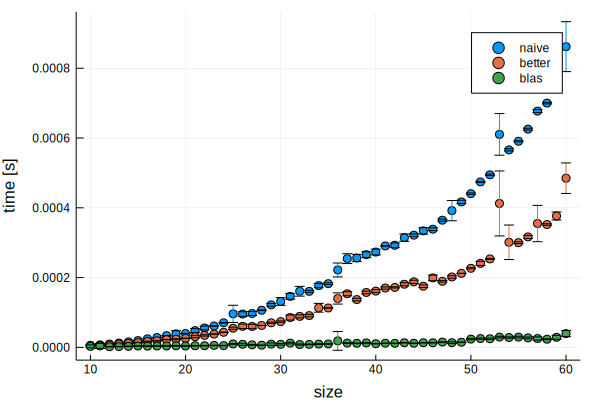

In [44]:
scatter(processed[:size], [processed[:naive_avg], processed[:better_avg], processed[:blas_avg]],
    yerr=[processed[:naive_std] processed[:better_std] processed[:blas_std]], layout=1,
    xlabel="size", ylabel="time [s]", labels=["naive" "better" "blas"])

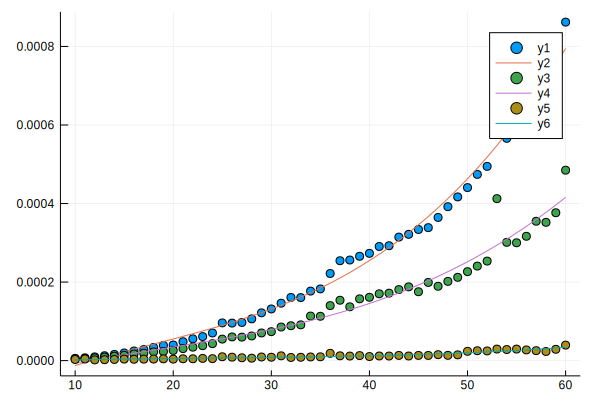

In [61]:
naive_poly = polyfit(processed[:size], processed[:naive_avg], 3)
better_poly = polyfit(processed[:size], processed[:better_avg], 3)
blas_poly = polyfit(processed[:size], processed[:blas_avg], 3)

naive_p = [naive_poly(x) for x = processed[:size]]
better_p = [better_poly(x) for x = processed[:size]]
blas_p = [blas_poly(x) for x = processed[:size]]


scatter(processed[:size], processed[:naive_avg])
plot!(processed[:size], naive_p)
scatter!(processed[:size], processed[:better_avg])
plot!(processed[:size], better_p)
scatter!(processed[:size], processed[:blas_avg])
plot!(processed[:size], blas_p)